In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [4]:
# Dataset from https://www.kaggle.com/jessemostipak/hotel-booking-demand

df = pd.read_csv('./Data/hotel_bookings.csv')

In [5]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# Converting string values into ints

In [8]:
# Converting hotel types from str to int

df.hotel = df.hotel.map({'City Hotel':0, 'Resort Hotel':1})
df.hotel.unique()

array([1, 0], dtype=int64)

In [9]:
# Converting month from str to int

df.arrival_date_month = df.arrival_date_month.map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September': 9, 'October':10, 'November':11, 'December':12})

In [10]:
# Creating a timeseries date and extraction of weekdays

df['date'] = pd.to_datetime(df['arrival_date_year'].map(str) + '-' + df['arrival_date_month'].map(str) + '-' + df['arrival_date_day_of_month'].map(str))

In [11]:
df['weekday'] = df['date'].dt.weekday

In [12]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [13]:
# Converting meal from str to int
df.meal = df.meal.map({'Undefined':0, 'BB':1, 'HB':2, 'FB':3, 'SC':4})

df.meal.unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [14]:
# Converting country from str to int using LabelEncoder

df.country = df.country.fillna('O')     # Filling Null values for the LabelEncoder
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df.country.unique()

array([136,  59, 170,  51,  76,  56, 127, 140, 124, 128,   6, 134,  43,
        15,  29,  34,  66,  81, 123,  46, 141, 155,  11,  52,  42,  25,
        54, 113,  27, 100, 154,   3,  75,  31, 107, 103, 167, 149, 101,
       135, 150,  30,  12,  23,  99, 163, 175,   1,  80,  40, 176,  37,
       177,  48,  91,  38,  72,   5, 162,  82,  71,  69,  77,  60,   4,
        63, 169,  83,  28,  41,  35,  61,  92, 121, 106, 172, 153,  55,
        86, 129,  73,  94, 132, 145, 156,  13,  20, 126, 159,  47, 108,
       117,   7,  85,  98,  39,  33,  22, 115,  36, 152, 166,  19,  32,
        84, 157, 146,  14, 143, 174, 133, 139,  50, 131, 110, 116,  49,
       105,  79, 171, 125,  21, 102, 158, 164,  44, 151,  90,  53,  78,
        70, 142,  88, 104,  18,  74, 160, 122,  16, 173, 165,  58,  62,
       161,  64,  87,  97,  65, 112, 168, 118,  57, 111, 130,  17,  95,
       109, 119,  24, 137,  26,   0,   2, 148,  45, 138,  68,  96,   9,
        67,   8, 114, 120,  89, 144,  10, 147,  93])

In [15]:
df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [16]:
# Converting market_segment from str to int

le = LabelEncoder()
df['market_segment'] = le.fit_transform(df['market_segment'])
df.market_segment.unique()

array([3, 2, 6, 5, 1, 4, 7, 0])

In [17]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [18]:
# Converting distribution_channel from str to int

df.distribution_channel = df.distribution_channel.map({'Undefined':0, 'Direct':1, 'Corporate':2, 'TA/TO':3, 'GDS':4})
df.distribution_channel.unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [19]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [20]:
# Converting reserved_room_type from str to int

le = LabelEncoder()
df['reserved_room_type'] = le.fit_transform(df['reserved_room_type'])
df.reserved_room_type.unique()

array([2, 0, 3, 4, 6, 5, 7, 8, 9, 1])

In [21]:
df.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [22]:
# Converting assigned_room_type from str to int

le = LabelEncoder()
df['assigned_room_type'] = le.fit_transform(df['assigned_room_type'])
df.assigned_room_type.unique()

array([ 2,  0,  3,  4,  6,  5,  8,  1,  7, 11, 10,  9])

In [23]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [24]:
# Converting deposit_type from str to int

df.deposit_type = df.deposit_type.map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})
df.deposit_type.unique()

array([0, 1, 2], dtype=int64)

In [25]:
df.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [26]:
# Converting customer_type from str to int

df.customer_type = df.customer_type.map({'Transient':1, 'Transient-Party':2, 'Contract':3, 'Group':4})
df.customer_type.unique()

array([1, 3, 2, 4], dtype=int64)

In [27]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [28]:
# Converting reservation_status from str to int

df.reservation_status = df.reservation_status.map({'No-Show':0, 'Check-Out':1, 'Canceled':2})
df.reservation_status.unique()

array([1, 2, 0], dtype=int64)

In [29]:
df.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3], dtype=int64)

In [30]:
# Removing a few outliers - made the results worse!
# df = df[~(df.required_car_parking_spaces > 3)]  # 2 bookings had a requirement of 8 car parking spaces
# df = df[~(df.adr == df.adr.max())]              # 1 booking had a daily rate of 5400

In [31]:
# Filling missing values with 0

df.children = df.children.fillna(0)
df.children = df.children.astype(int)

df.agent = df.agent.fillna(0)
df.agent = df.agent.astype(int)

df.company = df.company.fillna(0)
df.company = df.company.astype(int)

df.adr = df.adr.astype(int)

In [32]:
# Adults, babies and children cant be 0 at same time, so these rows have to be dropped

ghost_filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)
df = df[~ghost_filter]

In [33]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
reservation_status                0.917176
deposit_type                      0.480483
lead_time                         0.292876
country                           0.269327
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
assigned_room_type                0.175843
distribution_channel              0.171416
booking_changes                   0.144832
hotel                             0.137082
customer_type                     0.122024
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
reserved_room_type                0.062216
market_segment                    0.059419
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
adr                               0.046858
agent                             0.046770
babies                            0.032569
stays_in_we

In [34]:
# Separation of the 2 hotel types for a more detailed observation

df_city_hotel = df[df.hotel == 0]
df_resort_hotel = df[df.hotel == 1]

<AxesSubplot:>

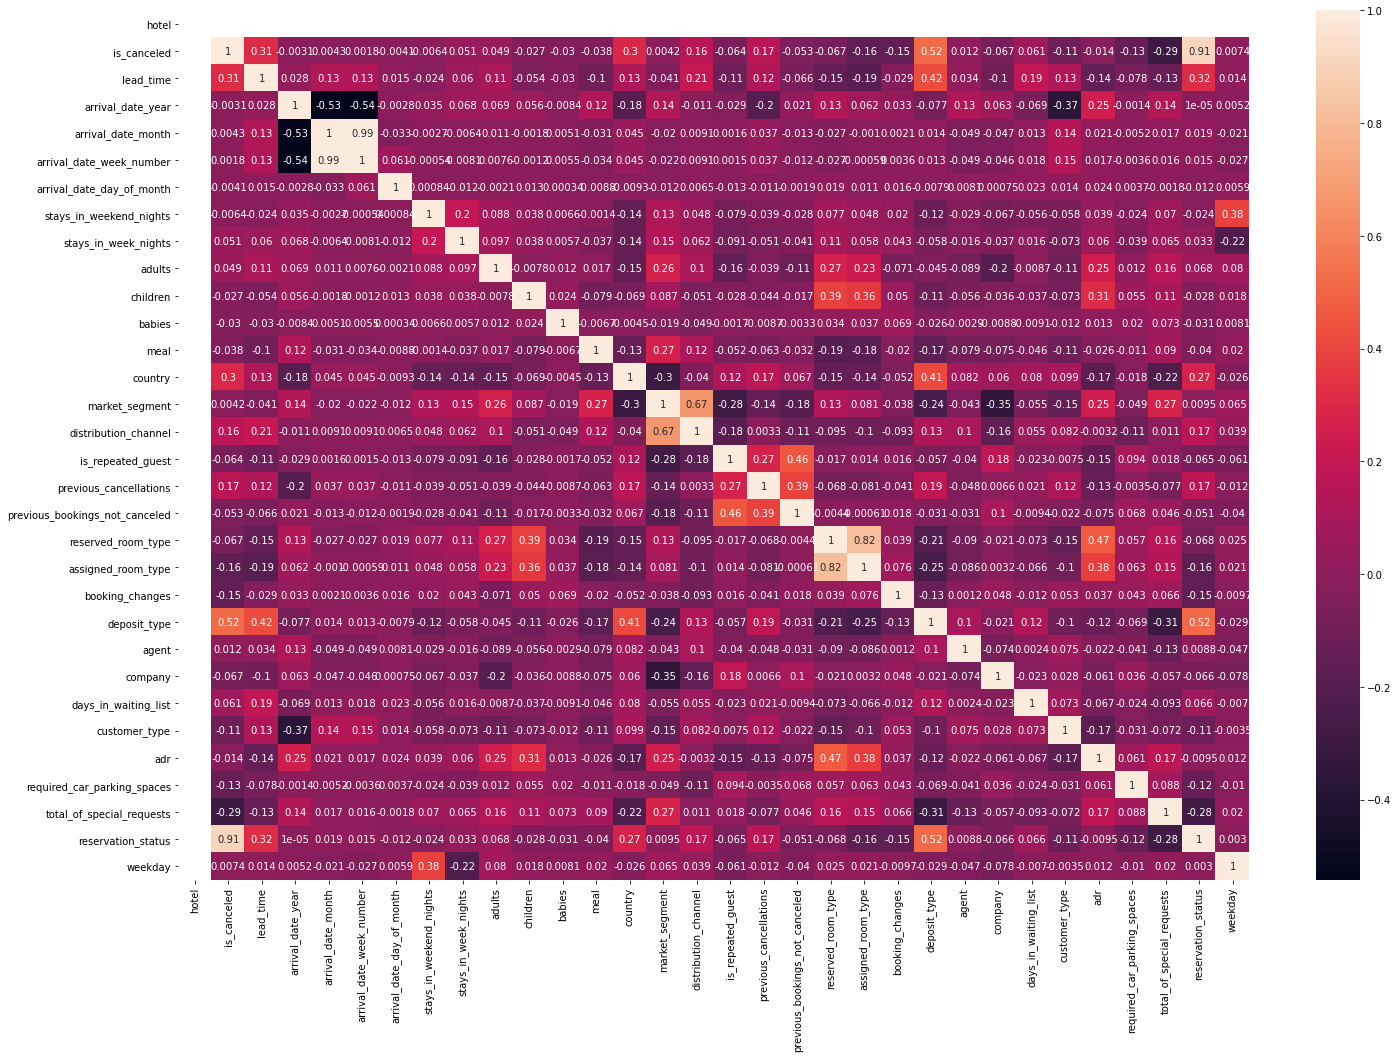

In [35]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_city_hotel.corr(), annot=True, ax = ax)

<AxesSubplot:>

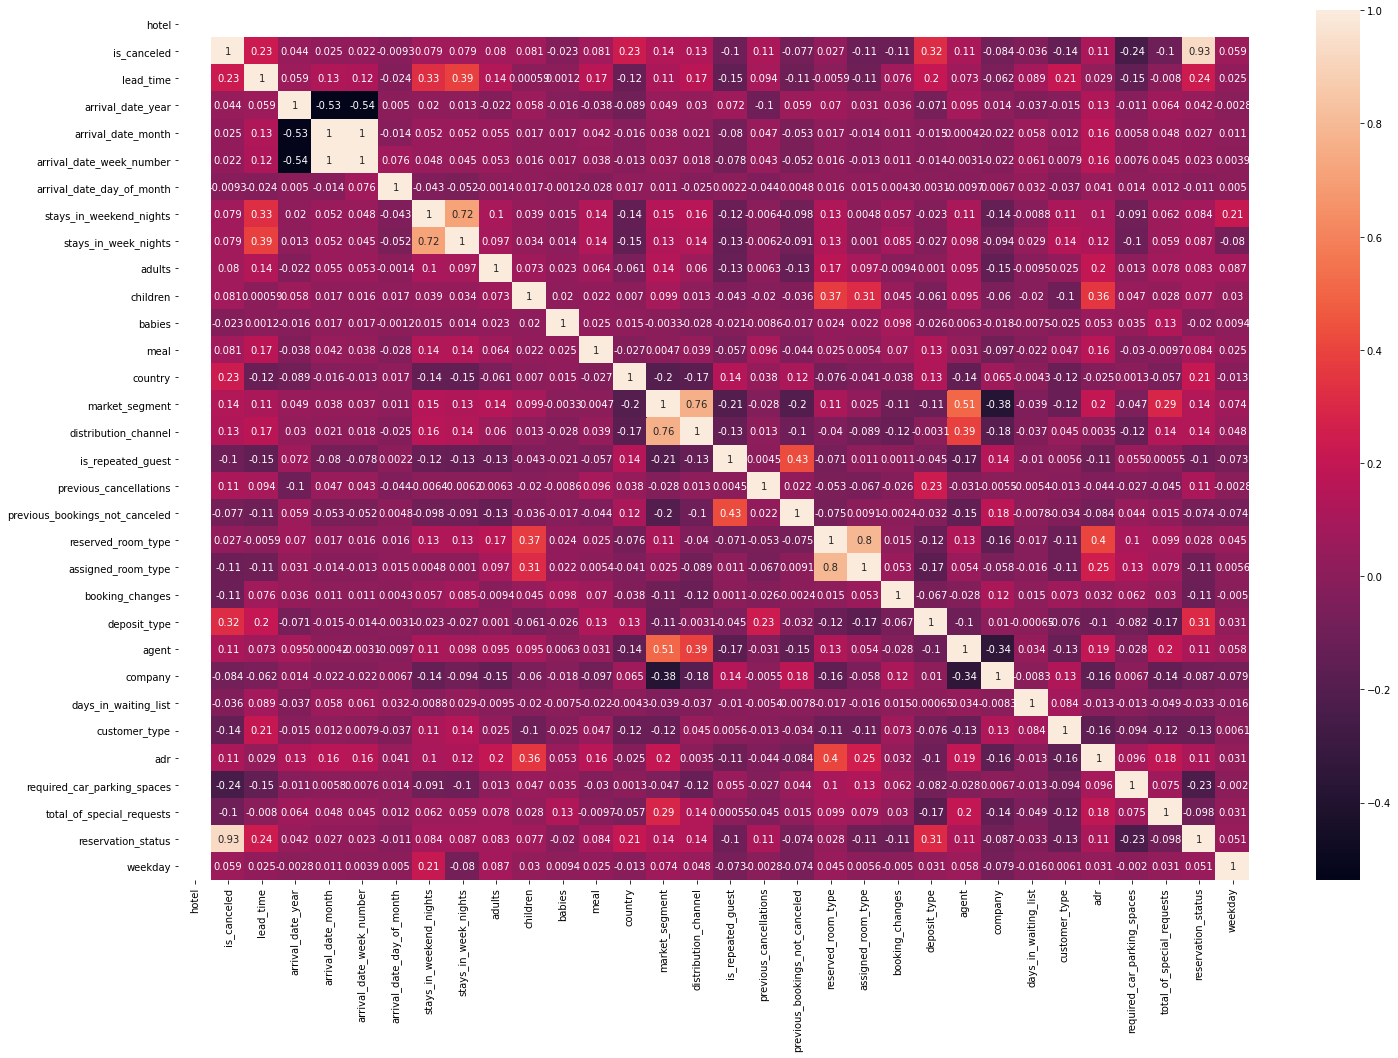

In [36]:
fig, ax = plt.subplots(figsize=(24, 16)) 
sns.heatmap(df_resort_hotel.corr(), annot=True, ax = ax)


In [37]:
# CANCELLATION PREDICTION - ALL DATA BUT WITHOUT RESERVATION_STATUS

In [38]:
X = df_city_hotel.drop(['is_canceled', 'reservation_status', 'reservation_status_date', 'date'], axis = 1)
y = df_city_hotel['is_canceled']
y = np.array(y)

In [39]:
# Scaling

X_scaled = StandardScaler().fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 3)

In [41]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, model_lr_prediction)

conf_lr = confusion_matrix(y_test, model_lr_prediction)
clf_report_lr = classification_report(y_test, model_lr_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_lr}")
print(f"Confusion Matrix : \n{conf_lr}")
print(f"Classification Report : \n{clf_report_lr}")

Accuracy Score of Ada Boost Classifier is : 0.8030063790816648
Confusion Matrix : 
[[8468  782]
 [2337 4246]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      9250
           1       0.84      0.64      0.73      6583

    accuracy                           0.80     15833
   macro avg       0.81      0.78      0.79     15833
weighted avg       0.81      0.80      0.80     15833



In [42]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.5802122208227821

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.32896
Feature: 2, Score: 0.10076
Feature: 3, Score: 0.09120
Feature: 4, Score: -0.05369
Feature: 5, Score: 0.01631
Feature: 6, Score: 0.06934
Feature: 7, Score: 0.15616
Feature: 8, Score: 0.07730
Feature: 9, Score: 0.05895
Feature: 10, Score: 0.01788
Feature: 11, Score: 0.05743
Feature: 12, Score: 0.41480
Feature: 13, Score: 0.49609
Feature: 14, Score: -0.04883
Feature: 15, Score: 0.01104
Feature: 16, Score: 0.92642
Feature: 17, Score: -0.73789
Feature: 18, Score: 0.58259
Feature: 19, Score: -0.72426
Feature: 20, Score: -0.20703
Feature: 21, Score: 2.31595
Feature: 22, Score: -0.18435
Feature: 23, Score: -0.01164
Feature: 24, Score: -0.03910
Feature: 25, Score: -0.23306
Feature: 26, Score: 0.19595
Feature: 27, Score: -3.60023
Feature: 28, Score: -0.59670
Feature: 29, Score: 0.04048


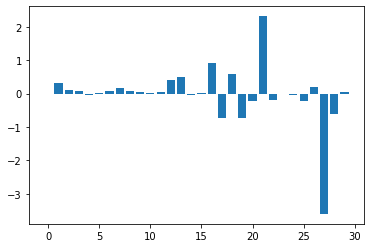

In [43]:
#Feature Importance

# Get importance
importance = model_lr.coef_[0]

# Summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [44]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, model_dt_prediction)

conf_dt = confusion_matrix(y_test, model_dt_prediction)
clf_report_dt = classification_report(y_test, model_dt_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_dt}")
print(f"Confusion Matrix : \n{conf_dt}")
print(f"Classification Report : \n{clf_report_dt}")

Accuracy Score of Ada Boost Classifier is : 0.8541653508494915
Confusion Matrix : 
[[8063 1187]
 [1122 5461]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      9250
           1       0.82      0.83      0.83      6583

    accuracy                           0.85     15833
   macro avg       0.85      0.85      0.85     15833
weighted avg       0.85      0.85      0.85     15833



In [45]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.7002399128788147

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.11805
Feature: 2, Score: 0.01808
Feature: 3, Score: 0.01179
Feature: 4, Score: 0.04330
Feature: 5, Score: 0.05046
Feature: 6, Score: 0.01628
Feature: 7, Score: 0.03003
Feature: 8, Score: 0.01021
Feature: 9, Score: 0.00486
Feature: 10, Score: 0.00060
Feature: 11, Score: 0.00923
Feature: 12, Score: 0.09466
Feature: 13, Score: 0.03570
Feature: 14, Score: 0.00367
Feature: 15, Score: 0.00096
Feature: 16, Score: 0.03100
Feature: 17, Score: 0.01463
Feature: 18, Score: 0.00730
Feature: 19, Score: 0.01169
Feature: 20, Score: 0.01136
Feature: 21, Score: 0.26968
Feature: 22, Score: 0.03285
Feature: 23, Score: 0.00146
Feature: 24, Score: 0.00122
Feature: 25, Score: 0.01674
Feature: 26, Score: 0.06373
Feature: 27, Score: 0.00861
Feature: 28, Score: 0.05707
Feature: 29, Score: 0.02479


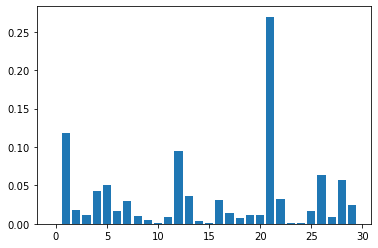

In [46]:
#Feature Importance

# get importance

importance = model_dt.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [47]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_dt)):
    if feature_dt[i]<0:
        feature_dt[i] = feature_dt[i]*(-1)

feature_dt = pd.DataFrame(feature_dt)
feature_dt.reset_index(inplace=True)
feature_dt.columns = ['feature', 'score']
feature_dt['feature_name'] = X.columns
feature_dt.sort_values(by=['score'], ascending = False, inplace=True)
feature_dt.reset_index(drop = True, inplace = True)
feature_dt

NameError: name 'feature_dt' is not defined

Maximum:  0.959731543624161
Mean:  0.8153733432261981


<AxesSubplot:>

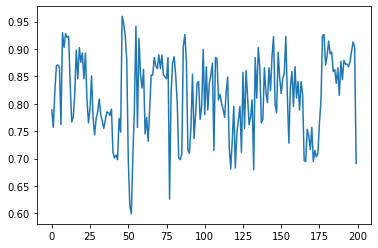

In [216]:
# K-Fold DecisionTree
model_kfdt = cross_val_score(tree.DecisionTreeClassifier(max_depth =8), X, y, cv=200)   # Best result with max_depth =5), X, y, cv=25
print('Maximum: ', model_kfdt.max())
print('Mean: ', model_kfdt.mean())

model_kfdt_prediction = model_kfdt.predict(X_test)
accuracy_kfdt = accuracy_score(y_test, model_kfdt_prediction)

conf_kfdt = confusion_matrix(y_test, model_kfdt_prediction)
clf_report_kfdt = classification_report(y_test, model_kfdt_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_kfdt}")
print(f"Confusion Matrix : \n{conf_kfdt}")
print(f"Classification Report : \n{clf_report_kfdt}")

model_kfdt = pd.Series(model_kfdt)
model_kfdt.plot()


In [217]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, model_knn_prediction)

conf_knn = confusion_matrix(y_test, model_knn_prediction)
clf_report_knn = classification_report(y_test, model_knn_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_knn}")
print(f"Confusion Matrix : \n{conf_knn}")
print(f"Classification Report : \n{clf_report_knn}")

0.8316835835919806

In [218]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.6362467806217535

In [219]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=800).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
version_rf = accuracy_score(y_test, model_rf_prediction)
version_rf

0.8953107960741549

In [220]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.772226318890683

Feature: 0, Score: 0.00854
Feature: 1, Score: 0.12137
Feature: 2, Score: 0.02302
Feature: 3, Score: 0.02753
Feature: 4, Score: 0.04636
Feature: 5, Score: 0.04770
Feature: 6, Score: 0.01910
Feature: 7, Score: 0.03179
Feature: 8, Score: 0.01224
Feature: 9, Score: 0.00574
Feature: 10, Score: 0.00073
Feature: 11, Score: 0.01235
Feature: 12, Score: 0.11292
Feature: 13, Score: 0.04605
Feature: 14, Score: 0.01321
Feature: 15, Score: 0.00195
Feature: 16, Score: 0.03333
Feature: 17, Score: 0.00403
Feature: 18, Score: 0.01403
Feature: 19, Score: 0.02471
Feature: 20, Score: 0.02039
Feature: 21, Score: 0.11138
Feature: 22, Score: 0.05358
Feature: 23, Score: 0.00417
Feature: 24, Score: 0.00212
Feature: 25, Score: 0.02648
Feature: 26, Score: 0.06872
Feature: 27, Score: 0.02221
Feature: 28, Score: 0.05547
Feature: 29, Score: 0.02876


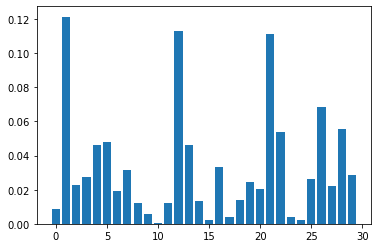

In [155]:
#Feature Importance

feature_rf = []

# get importance

importance = model_rf.feature_importances_

# summarize feature importance

for i,v in enumerate(importance):
	feature_rf.append(v)	# This will be used later to predict the cancellation rate only for the top 15 features
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [156]:
# Sorting the features by importance

# Turning negative into positive scores
for i in range(len(feature_rf)):
    if feature_rf[i]<0:
        feature_rf[i] = feature_rf[i]*(-1)

feature_rf = pd.DataFrame(feature_rf)
feature_rf.reset_index(inplace=True)
feature_rf.columns = ['feature', 'score']
feature_rf['feature_name'] = X.columns
feature_rf.sort_values(by=['score'], ascending = False, inplace=True)
feature_rf.reset_index(drop = True, inplace = True)

rf_top15_features = []
for i in range(15):
    rf_top15_features.append(feature_rf.feature_name[i])

df_rf_top15 = X[rf_top15_features]
df_rf_top15

,lead_time,country,deposit_type,adr,total_of_special_requests,agent,arrival_date_day_of_month,arrival_date_week_number,market_segment,previous_cancellations,stays_in_week_nights,weekday,arrival_date_month,customer_type,assigned_room_type
0,342,136,0,0,0,0,1,27,1,0,0,2,7,1,3
1,737,136,0,0,0,0,1,27,1,0,0,2,7,1,3
2,7,60,0,75,0,0,1,27,1,0,1,2,7,1,3
3,13,60,0,75,0,304,1,27,2,0,1,2,7,1,1
4,14,60,0,98,1,240,1,27,3,0,2,2,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,16,0,96,0,394,30,35,4,0,5,2,8,1,1
119386,102,57,0,225,2,9,31,35,3,0,5,3,8,1,5
119387,34,44,0,157,4,9,31,35,3,0,5,3,8,1,4
119388,109,60,0,104,0,89,31,35,3,0,5,3,8,1,1


In [226]:
# Ada Boost
model_ada = AdaBoostClassifier(n_estimators = 1000).fit(X_train, y_train)
model_ada_prediction = model_ada.predict(X_test)
accuracy_ada = accuracy_score(y_test, model_ada_prediction)

conf_ada = confusion_matrix(y_test, model_ada_prediction)
clf_report_ada = classification_report(y_test, model_ada_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_ada}")
print(f"Confusion Matrix : \n{conf_ada}")
print(f"Classification Report : \n{clf_report_ada}")

Accuracy Score of Ada Boost Classifier is : 0.8442244778122641
Confusion Matrix : 
[[13687  1306]
 [ 2408  6441]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     14993
           1       0.83      0.73      0.78      8849

    accuracy                           0.84     23842
   macro avg       0.84      0.82      0.83     23842
weighted avg       0.84      0.84      0.84     23842



In [227]:
kappa_ada = cohen_kappa_score(y_test, model_ada_prediction)
kappa_ada

0.6575498709610557

In [228]:
# Gradient Boosting Classifier
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_gb_prediction = model_gb.predict(X_test)

accuracy_gb = accuracy_score(y_test, model_gb_prediction)
conf_gb = confusion_matrix(y_test, model_gb_prediction)
clf_report_gb = classification_report(y_test, model_gb_prediction)

print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")

NameError: name 'acc_gb' is not defined

In [230]:
print(f"Accuracy Score of Ada Boost Classifier is : {accuracy_gb}")
print(f"Confusion Matrix : \n{conf_gb}")
print(f"Classification Report : \n{clf_report_gb}")

Accuracy Score of Ada Boost Classifier is : 0.854458518580656
Confusion Matrix : 
[[13888  1105]
 [ 2365  6484]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     14993
           1       0.85      0.73      0.79      8849

    accuracy                           0.85     23842
   macro avg       0.85      0.83      0.84     23842
weighted avg       0.85      0.85      0.85     23842



In [231]:
kappa_gb = cohen_kappa_score(y_test, model_gb_prediction)
kappa_gb

0.6788422402615257

In [157]:
# XgBoost Classifier
model_xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180).fit(X_train, y_train)
model_xgb_prediction = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, model_xgb_prediction)
conf_xgb = confusion_matrix(y_test, model_xgb_prediction)
clf_report_xgb = classification_report(y_test, model_xgb_prediction)

print(f"Accuracy Score of XgBoost Classifier is : {accuracy_xgb}")
print(f"Confusion Matrix : \n{conf_xgb}")
print(f"Classification Report : \n{clf_report_xgb}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7946900427816458

In [158]:
kappa_xgb = cohen_kappa_score(y_test, model_xgb_prediction)
kappa_xgb

0.5326248705570142

In [159]:
# Cat Boost Classifier
model_cat = CatBoostClassifier(iterations=100).fit(X_train, y_train)
model_cat_prediction = model_cat.predict(X_test)

accuracy_cat = accuracy_score(y_test, model_cat_prediction)
conf_cat = confusion_matrix(y_test, model_cat_prediction)
clf_report_cat = classification_report(y_test, model_cat_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_cat}")
print(f"Confusion Matrix : \n{conf_cat}")
print(f"Classification Report : \n{clf_report_cat}")

0.8523613790789363

In [160]:
kappa_cat = cohen_kappa_score(y_test, model_cat_prediction)
kappa_cat

0.6846172234739333

In [161]:
# Extra Trees Classifier
model_etc = ExtraTreesClassifier().fit(X_train, y_train)
model_etc_prediction = model_etc.predict(X_test)

accuracy_etc = accuracy_score(y_test, model_etc_prediction)
conf_etc = confusion_matrix(y_test, model_etc_prediction)
clf_report_etc = classification_report(y_test, model_etc_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_etc}")
print(f"Confusion Matrix : \n{conf_etc}")
print(f"Classification Report : \n{clf_report_etc}")

0.8820568744232866

In [162]:
kappa_etc = cohen_kappa_score(y_test, model_etc_prediction)
kappa_etc

0.7429509180853453

In [ ]:
# LGBM Classifier
model_lgbm = LGBMClassifier(learning_rate = 1).fit(X_train, y_train)
model_lgbm_prediction = model_lgbm.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, model_lgbm_prediction)
conf_lgbm = confusion_matrix(y_test, model_lgbm_prediction)
clf_report_lgbm = classification_report(y_test, model_lgbm_prediction)

print(f"Accuracy Score of Cat Boost Classifier is : {accuracy_lgbm}")
print(f"Confusion Matrix : \n{conf_lgbm}")
print(f"Classification Report : \n{clf_report_lgbm}")

In [ ]:
kappa_lgbm = cohen_kappa_score(y_test, model_lgbm_prediction)
kappa_lgbm

In [ ]:
# Voting Classifier
classifiers = [('Gradient Boosting Classifier', model_gb), ('Cat Boost Classifier', model_cat), ('XGboost', model_xgb),  
               ('Decision Tree', model_dt), ('Extra Tree', model_etc), ('Light Gradient', model_lgbm), ('Random Forest', model_rf), 
               ('Ada Boost', model_ada), ('Logistic', model_lr), ('Knn', model_knn)]
model_vc = VotingClassifier(estimators = classifiers).fit(X_train, y_train)
model_vc_prediction = model_vc.predict(X_test)

accuracy_vc = accuracy_score(y_test, model_vc_prediction)
conf_vc = confusion_matrix(y_test, model_vc_prediction)
clf_report_vc = classification_report(y_test, model_vc_prediction)

print(f"Accuracy Score of Voting Classifier is : {accuracy_vc}")
print(f"Confusion Matrix : \n{conf_vc}")
print(f"Classification Report : \n{clf_report_vc}")

In [ ]:
kappa_vc = cohen_kappa_score(y_test, model_vc_prediction)
kappa_vc

In [ ]:
# Models Comparison
models_city_hotel = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'],
    'Score' : [accuracy_lr, accuracy_knn, accuracy_dt, version_rf, accuracy_ada, accuracy_gb, accuracy_xgb, accuracy_cat, # KORRIGIEREN
              accuracy_etc, accuracy_lgbm, accuracy_vc],
    'Kappa' : [kappa_lr, kappa_knn, kappa_dt, kappa_rf, kappa_ada, kappa_gb, kappa_xgb, kappa_cat, kappa_etc, kappa_lgbm, 
              kappa_vc]
})


models.sort_values(by = 'Kappa', ascending = False)